In [179]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (accuracy_score, precision_score, recall_score,
                             f1_score, roc_auc_score, log_loss, confusion_matrix)
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE

from sklearn.datasets import make_blobs
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

In [180]:
data1=pd.read_csv("OC_Marker.csv")
data1.head()

,Age,Menopause,CA19-9,CA72-4,AFP,CA125,HE4,CEA,TYPE,TYPE.1
0,47,0,36.48,6.42,3.58,15.36,183.94,1.40,0,BOT
1,61,1,19.98,10.17,34.24,2444.00,934.10,2.46,0,BOT
2,39,0,12.18,10.17,1.50,56.08,47.56,0.77,0,BOT
3,45,1,18.41,131.60,2.75,2555.00,853.50,0.82,0,BOT
4,45,0,11.15,10.17,2.36,1391.00,404.90,0.42,0,BOT


In [181]:
data2=pd.read_csv("OC_Genarel_Chem.csv")
data2.head()

,Age,AG,ALB,ALP,ALT,AST,BUN,Ca,CL,CO2CP,...,IBIL,K,Mg,Na,PHOS,TBIL,TP,UA,TYPE,TYPE.1
0,47,19.36,45.4,56,11,24,5.35,2.48,107.4,19.9,...,3.5,5.36,0.78,141.3,1.46,5.5,73.9,396.4,0,BOT
1,61,23.98,39.9,95,9,13,3.21,2.62,100.1,22.3,...,4.2,4.38,0.82,142.0,1.09,6.8,72.0,119.2,0,BOT
2,39,18.40,45.4,77,9,18,3.80,2.57,102.6,22.2,...,10.1,4.30,1.00,138.9,0.97,14.8,77.9,209.2,0,BOT
3,45,16.60,39.2,26,16,17,5.27,2.35,103.2,24.0,...,8.0,4.70,1.11,139.1,1.25,10.9,66.1,215.6,0,BOT
4,45,19.97,35.0,47,21,27,4.89,2.48,99.6,26.2,...,3.1,4.77,1.08,141.0,0.94,5.3,66.5,206.0,0,BOT


In [182]:
data3=pd.read_csv("OC_Blood_Routine.csv")
data3.head()

,Age,MPV,BASO#,BASO%,EO#,EO%,MCH,RDW,PDW,HGB,...,MONO#,MONO%,PLT,NEU,RBC,PCT,HCT,MCV,TYPE,TYPE.1
0,47,11.70,0.01,0.30,0.04,1.00,33.7,13.7,13.4,89.0,...,0.22,5.70,74,76.2,2.64,0.09,0.273,103.4,0,BOT
1,61,10.00,0.02,0.30,0.04,0.50,26.2,12.7,11.2,128.0,...,0.41,5.50,304,76.5,4.89,0.30,0.417,85.3,0,BOT
2,39,11.40,0.03,0.60,0.03,0.60,28.4,12.0,15.2,131.0,...,0.25,5.40,112,69.7,4.62,0.13,0.391,84.6,0,BOT
3,45,7.38,0.05,0.74,0.00,0.07,30.6,14.6,17.4,123.0,...,0.42,6.55,339,65.5,4.01,0.25,0.372,92.6,0,BOT
4,45,10.40,0.01,0.10,0.11,1.60,27.7,13.4,11.9,122.0,...,0.69,10.00,272,59.5,4.40,0.28,0.383,87.0,0,BOT


In [183]:
oc_blood_routine =data3.drop(columns=['TYPE','TYPE.1'])
oc_general_chem = data2.drop(columns=['TYPE','TYPE.1'])
print(oc_blood_routine)

     Age    MPV  BASO#  BASO%   EO#   EO%   MCH   RDW   PDW    HGB  LYM#  \
0     47  11.70   0.01   0.30  0.04  1.00  33.7  13.7  13.4   89.0  0.65   
1     61  10.00   0.02   0.30  0.04  0.50  26.2  12.7  11.2  128.0  1.27   
2     39  11.40   0.03   0.60  0.03  0.60  28.4  12.0  15.2  131.0  1.10   
3     45   7.38   0.05   0.74  0.00  0.07  30.6  14.6  17.4  123.0  1.73   
4     45  10.40   0.01   0.10  0.11  1.60  27.7  13.4  11.9  122.0  1.98   
..   ...    ...    ...    ...   ...   ...   ...   ...   ...    ...   ...   
344   52   9.90   0.00   0.00  0.01  0.30  31.1  11.9  10.8  142.0  1.18   
345   37  11.90   0.00   0.00  0.02  0.30  18.9  17.7  17.3   80.0  1.39   
346   59   9.70   0.02   0.60  0.05  1.50  29.4  11.6  10.4  144.0  1.10   
347   30  10.50   0.03   0.30  0.23  2.20  28.8  12.5  13.4  154.0  2.15   
348   39  10.30   0.01   0.20  0.04  0.80  31.0  12.1  11.0  128.0  1.52   

     LYM%  MONO#  MONO%  PLT    NEU   RBC   PCT    HCT    MCV  
0    16.8   0.22   5.70

In [184]:
combined_data = pd.concat([data1.set_index(['Age']),
                           oc_blood_routine.set_index(['Age']),
                           oc_general_chem.set_index(['Age'])],
                          axis=1).reset_index()

# Print the resulting combined dataset
print(combined_data)

     Age  Menopause  CA19-9  CA72-4    AFP    CA125     HE4   CEA  TYPE  \
0     47          0   36.48    6.42   3.58    15.36  183.94  1.40     0   
1     61          1   19.98   10.17  34.24  2444.00  934.10  2.46     0   
2     39          0   12.18   10.17   1.50    56.08   47.56  0.77     0   
3     45          1   18.41  131.60   2.75  2555.00  853.50  0.82     0   
4     45          0   11.15   10.17   2.36  1391.00  404.90  0.42     0   
..   ...        ...     ...     ...    ...      ...     ...   ...   ...   
344   52          0   15.11   10.17   2.09    50.80   31.45  1.74     1   
345   37          0    0.62   10.17   2.00    21.93   44.44  1.67     1   
346   59          1    2.18   10.17   2.83    51.33   42.65  2.31     1   
347   30          0   10.71   10.17   1.84    53.87   30.78  0.93     1   
348   39          0   28.79   10.17   1.61    46.45   33.42  0.76     1   

    TYPE.1  ...   GLO   GLU.  IBIL     K    Mg     Na  PHOS  TBIL    TP     UA  
0      BOT  ...  2

In [185]:
columns_t_drop = ['TYPE','TYPE.1']
x = combined_data.drop(columns=columns_t_drop,axis = 1)
x.head()

,Age,Menopause,CA19-9,CA72-4,AFP,CA125,HE4,CEA,MPV,BASO#,...,GLO,GLU.,IBIL,K,Mg,Na,PHOS,TBIL,TP,UA
0,47,0,36.48,6.42,3.58,15.36,183.94,1.40,11.70,0.01,...,28.5,4.67,3.5,5.36,0.78,141.3,1.46,5.5,73.9,396.4
1,61,1,19.98,10.17,34.24,2444.00,934.10,2.46,10.00,0.02,...,32.1,10.50,4.2,4.38,0.82,142.0,1.09,6.8,72.0,119.2
2,39,0,12.18,10.17,1.50,56.08,47.56,0.77,11.40,0.03,...,32.5,4.64,10.1,4.30,1.00,138.9,0.97,14.8,77.9,209.2
3,45,1,18.41,131.60,2.75,2555.00,853.50,0.82,7.38,0.05,...,26.9,4.76,8.0,4.70,1.11,139.1,1.25,10.9,66.1,215.6
4,45,0,11.15,10.17,2.36,1391.00,404.90,0.42,10.40,0.01,...,31.5,4.07,3.1,4.77,1.08,141.0,0.94,5.3,66.5,206.0


In [186]:
y = combined_data['TYPE']
y

scaler = MinMaxScaler()
x = scaler.fit_transform(x)
y

0      0
1      0
2      0
3      0
4      0
      ..
344    1
345    1
346    1
347    1
348    1
Name: TYPE, Length: 349, dtype: int64

In [187]:
# KNN CLASSIFIER

In [188]:
# Assuming x and y are your features and target variables
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2, random_state=1)

# Step 1: Basic KNN Model (with n_neighbors=5)
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(xtrain, ytrain)
ypred = knn.predict(xtest)

# Evaluate the basic KNN model
print("Basic KNN Model Evaluation:")
print(confusion_matrix(ytest, ypred))
print(classification_report(ytest, ypred))

Basic KNN Model Evaluation:
[[27  5]
 [ 8 30]]
              precision    recall  f1-score   support

           0       0.77      0.84      0.81        32
           1       0.86      0.79      0.82        38

    accuracy                           0.81        70
   macro avg       0.81      0.82      0.81        70
weighted avg       0.82      0.81      0.81        70



The optimal k value is 3 with the lowest error rate of 0.1714


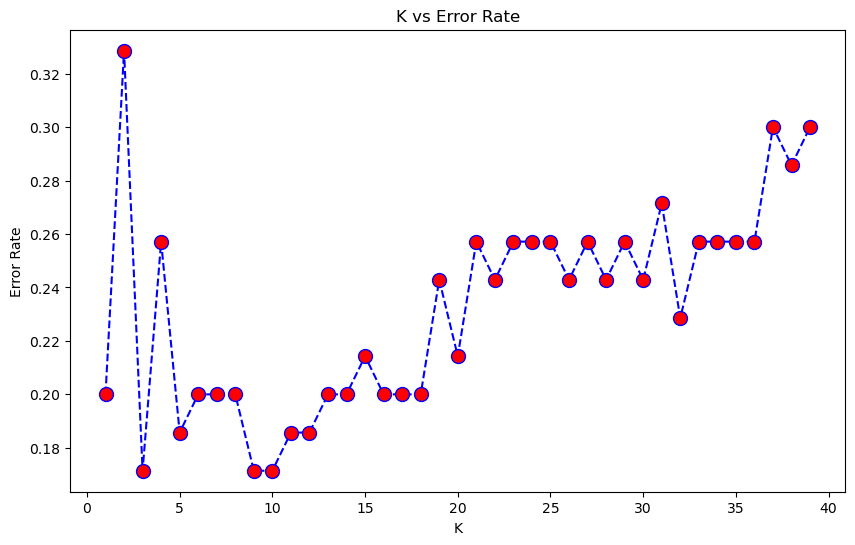

In [189]:
error_rate = []
k_values = range(1, 40)

for i in k_values:
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(xtrain, ytrain)
    pred_i = knn.predict(xtest)
    error_rate.append(np.mean(pred_i != ytest))

# Find the k value with the lowest error rate
optimal_k = k_values[np.argmin(error_rate)]
min_error_rate = np.min(error_rate)

# Print the optimal k and corresponding error rate
print(f"The optimal k value is {optimal_k} with the lowest error rate of {min_error_rate:.4f}")

# Plotting K vs Error rate
plt.figure(figsize=(10,6))
plt.plot(k_values, error_rate, color='blue', linestyle='--', markersize=10, markerfacecolor='red', marker='o')
plt.title('K vs Error Rate')
plt.xlabel('K')
plt.ylabel('Error Rate')
plt.show()

In [190]:
# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# KNN hyperparameter tuning
param_dist_knn = {'n_neighbors': range(1, 11)}
knn = RandomizedSearchCV(KNeighborsClassifier(), param_dist_knn, n_iter=5, cv=3, n_jobs=-1, random_state=42)
knn.fit(X_train, y_train)
best_knn = knn.best_estimator_

# Print the best k value (this is the value of n_neighbors that gives the best performance)
print(f"The best k value is: {knn.best_params_['n_neighbors']}")

# Evaluation function
def evaluate_model(model, X_train, y_train, X_test, y_test):
    y_pred = model.predict(X_test)
    metrics = {
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred, average='weighted'),
        'Recall': recall_score(y_test, y_pred, average='weighted'),
        'F1 Score': f1_score(y_test, y_pred, average='weighted'),
        'AUC': roc_auc_score(y_test, model.predict_proba(X_test)[:, 1]),
        'Log Loss': log_loss(y_test, model.predict_proba(X_test)),
    }
    print(confusion_matrix(y_test, y_pred))
    for metric, value in metrics.items():
        print(f"{metric}: {value:.4f}")

# Evaluate best KNN model
print("\nEvaluating KNN Model...")
evaluate_model(best_knn, X_train, y_train, X_test, y_test)


The best k value is: 8

Evaluating KNN Model...
[[29  7]
 [ 3 31]]
Accuracy: 0.8571
Precision: 0.8623
Recall: 0.8571
F1 Score: 0.8569
AUC: 0.9105
Log Loss: 1.3167


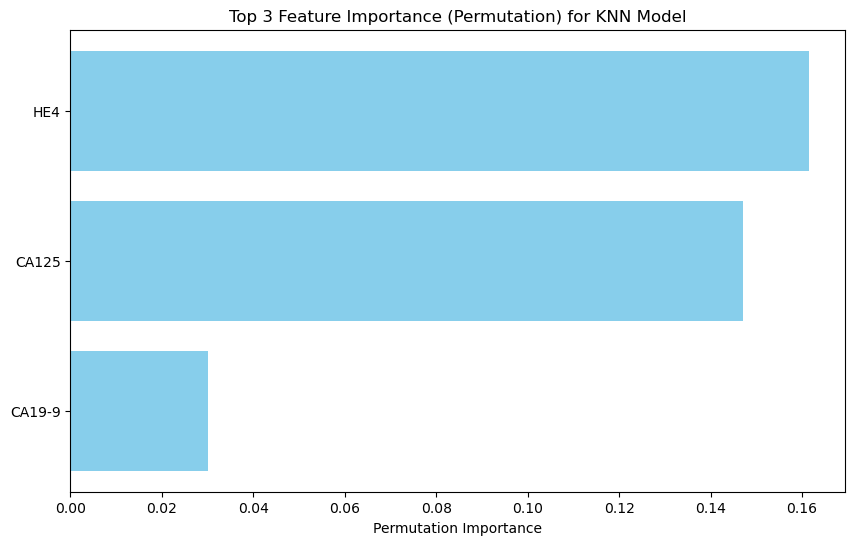

In [191]:
from sklearn.inspection import permutation_importance
import matplotlib.pyplot as plt

# Assuming best_knn is already fitted with the best k value from RandomizedSearchCV

# Perform permutation importance
perm_importance = permutation_importance(best_knn, X_test, y_test, n_repeats=10, random_state=42, n_jobs=-1)

# Extract feature importance values
importance = perm_importance.importances_mean

# Sort features by importance
sorted_idx = importance.argsort()

# Select the top 3 features
top_3_idx = sorted_idx[-3:]

# Plotting the top 3 feature importances
plt.figure(figsize=(10, 6))
plt.barh(X.columns[top_3_idx], importance[top_3_idx], align='center', color='skyblue')
plt.xlabel("Permutation Importance")
plt.title("Top 3 Feature Importance (Permutation) for KNN Model")
plt.show()


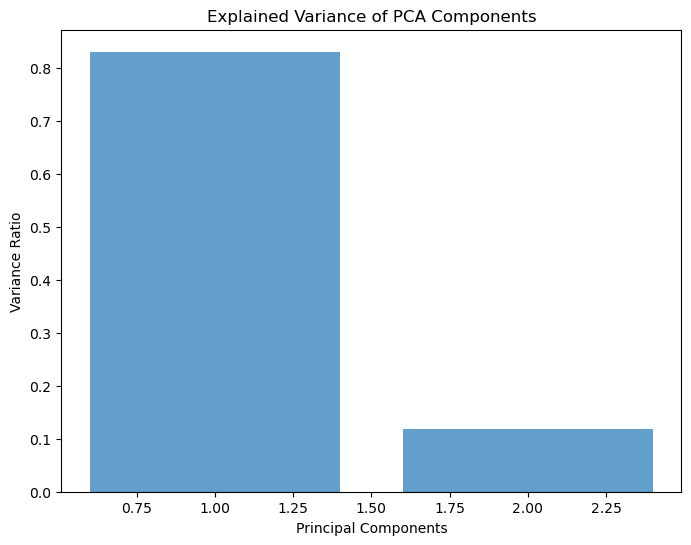

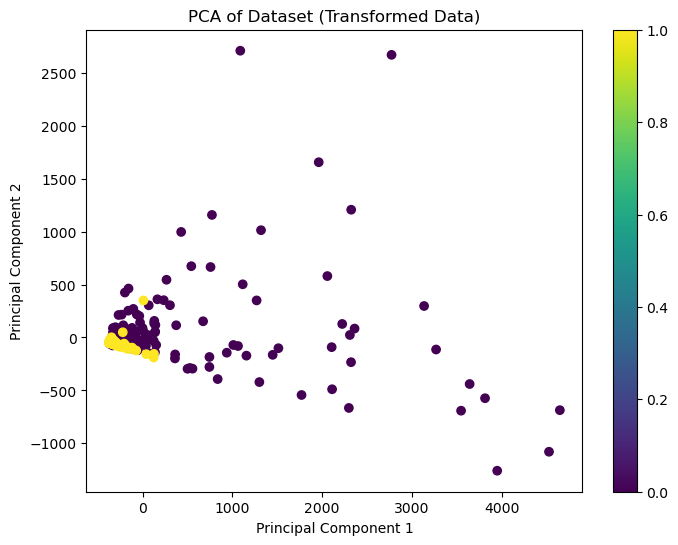

Train Accuracy: 0.8746
Test Accuracy: 0.8714
Training Confusion Matrix:
[[108  27]
 [  8 136]]
Testing Confusion Matrix:
[[29  7]
 [ 2 32]]


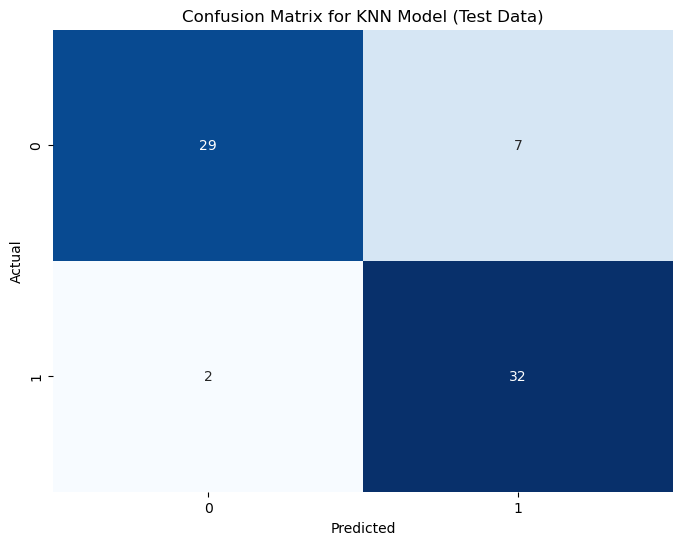

In [192]:
# Step 1: Apply PCA to reduce dimensions and extract the most important features
pca = PCA(n_components=2)  # Reduce to 2 components for visualization
X_pca = pca.fit_transform(X)

# Step 2: Visualize the Explained Variance Ratio of PCA Components
plt.figure(figsize=(8, 6))
plt.bar(range(1, pca.n_components_ + 1), pca.explained_variance_ratio_, alpha=0.7, align='center')
plt.xlabel('Principal Components')
plt.ylabel('Variance Ratio')
plt.title('Explained Variance of PCA Components')
plt.show()

# Step 3: Visualize the Transformed Data in 2D (PCA)
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis')
plt.title('PCA of Dataset (Transformed Data)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar()  # Add color bar for target classes
plt.show()

# Step 4: Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

# Step 5: Train the KNN Model on the PCA-transformed data
knn = KNeighborsClassifier(n_neighbors=8)
knn.fit(X_train, y_train)

# Step 6: Make predictions and evaluate the model
y_train_pred = knn.predict(X_train)
y_test_pred = knn.predict(X_test)

# Step 7: Print the evaluation metrics for the model
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f"Train Accuracy: {train_accuracy:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

# Confusion Matrix
print("Training Confusion Matrix:")
print(confusion_matrix(y_train, y_train_pred))

print("Testing Confusion Matrix:")
print(confusion_matrix(y_test, y_test_pred))

# Optional: You can visualize the confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_test_pred), annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix for KNN Model (Test Data)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


In [193]:
# RANDOM FOREST CLASSIFIER

In [194]:
import re
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, auc

from sklearn.metrics import accuracy_score, confusion_matrix , precision_score, recall_score, f1_score, roc_auc_score, log_loss  # Import metrics

In [195]:
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    roc_auc_score, log_loss, confusion_matrix
)

# Assuming 'combined_data' is already defined and has 'TYPE' and 'TYPE.1' columns
X = combined_data.drop(['TYPE', 'TYPE.1'], axis=1)  # Features
y = combined_data['TYPE']  # Target

# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Random Forest Classifier with GridSearch for Best Model
rfc = RandomForestClassifier(random_state=42)
param_grid_rfc = {
    'n_estimators': [200, 500],
    'max_features': ['sqrt', 'log2'],
    'max_depth': [4, 5, 6, 7, 8],
    'criterion': ['gini', 'entropy']
}
CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid_rfc, cv=5)
CV_rfc.fit(X_train, y_train)

# Best RFC model
m_best_rfc = CV_rfc.best_estimator_
y_pred_rfc = m_best_rfc.predict(X_test)
y_train_pred_rfc = m_best_rfc.predict(X_train)

# Metrics for Best RFC Model
train_accuracy = accuracy_score(y_train, y_train_pred_rfc)
test_accuracy = accuracy_score(y_test, y_pred_rfc)
precision = precision_score(y_test, y_pred_rfc, average='weighted', zero_division=1)
recall = recall_score(y_test, y_pred_rfc, average='weighted')
f1 = f1_score(y_test, y_pred_rfc, average='weighted')
auc = roc_auc_score(y_test, m_best_rfc.predict_proba(X_test)[:, 1])
logloss = log_loss(y_test, m_best_rfc.predict_proba(X_test))

# Printing Evaluation Results
print(f"Best RFC Model Evaluation:")
print("Training confusion matrix:")
print(confusion_matrix(y_train, y_train_pred_rfc))
print("Testing confusion matrix:")
print(confusion_matrix(y_test, y_pred_rfc))
print(f"Train Accuracy: {train_accuracy:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"AUC: {auc:.4f}")
print(f"Log Loss: {logloss:.4f}")



Best RFC Model Evaluation:
Training confusion matrix:
[[127   8]
 [  0 144]]
Testing confusion matrix:
[[30  6]
 [ 1 33]]
Train Accuracy: 0.9713
Test Accuracy: 0.9000
Precision: 0.9087
Recall: 0.9000
F1 Score: 0.8997
AUC: 0.9412
Log Loss: 0.3424


In [196]:
# Random Forest Classifier (Overfitting example)
rfc_overfit = RandomForestClassifier(n_estimators=1000, max_depth=None, random_state=42)
rfc_overfit.fit(X_train, y_train)
y_pred_rfc_overfit = rfc_overfit.predict(X_test)
rfc_overfit_train_acc = accuracy_score(y_train, rfc_overfit.predict(X_train))
rfc_overfit_test_acc = accuracy_score(y_test, y_pred_rfc_overfit)

# Print the results for the overfitting scenario
print(f"Random Forest (Overfitting):")
print(f"Train Accuracy: {rfc_overfit_train_acc:.4f}")
print(f"Test Accuracy: {rfc_overfit_test_acc:.4f}")
print(confusion_matrix(y_train, rfc_overfit.predict(X_train)))
print(confusion_matrix(y_test, y_pred_rfc_overfit))



Random Forest (Overfitting):
Train Accuracy: 1.0000
Test Accuracy: 0.9143
[[135   0]
 [  0 144]]
[[31  5]
 [ 1 33]]


In [197]:
# Random Forest Classifier (Underfitting example)
rfc_underfit = RandomForestClassifier(n_estimators=10, max_depth=2, random_state=42)
rfc_underfit.fit(X_train, y_train)
y_pred_rfc_underfit = rfc_underfit.predict(X_test)
rfc_underfit_train_acc = accuracy_score(y_train, rfc_underfit.predict(X_train))
rfc_underfit_test_acc = accuracy_score(y_test, y_pred_rfc_underfit)

# Print the results for the underfitting scenario
print(f"Random Forest (Underfitting):")
print(f"Train Accuracy: {rfc_underfit_train_acc:.4f}")
print(f"Test Accuracy: {rfc_underfit_test_acc:.4f}")
print(confusion_matrix(y_train, rfc_underfit.predict(X_train)))
print(confusion_matrix(y_test, y_pred_rfc_underfit))



Random Forest (Underfitting):
Train Accuracy: 0.9104
Test Accuracy: 0.8857
[[115  20]
 [  5 139]]
[[29  7]
 [ 1 33]]


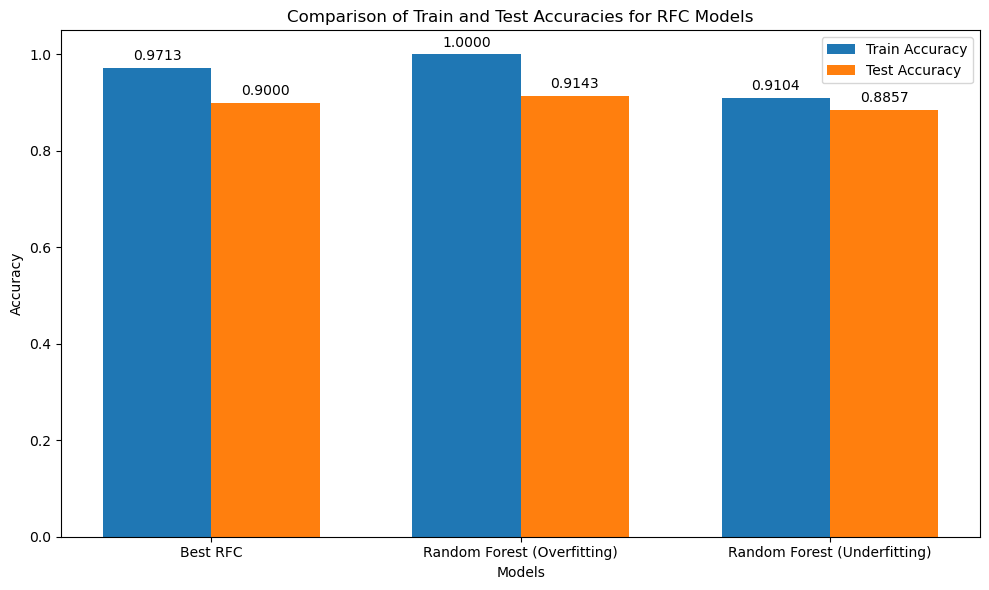

In [198]:
# Data for comparison
models = ['Best RFC', 'Random Forest (Overfitting)', 'Random Forest (Underfitting)']
train_accuracies = [m_best_rfc_train_acc, rfc_overfit_train_acc, rfc_underfit_train_acc]
test_accuracies = [m_best_rfc_test_acc, rfc_overfit_test_acc, rfc_underfit_test_acc]

# Plotting
plt.figure(figsize=(10, 6))
x = np.arange(len(models))  # X-axis positions
width = 0.35  # Bar width

# Plot bars for Train and Test Accuracies
bars_train = plt.bar(x - width/2, train_accuracies, width, label='Train Accuracy')
bars_test = plt.bar(x + width/2, test_accuracies, width, label='Test Accuracy')

# Adding labels and title
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Comparison of Train and Test Accuracies for RFC Models')
plt.xticks(x, models)
plt.legend()

# Adding values on top of the bars
for bar in bars_train:
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01,  # Positioning text slightly above the bar
             f'{bar.get_height():.4f}', ha='center', va='bottom', fontsize=10)

for bar in bars_test:
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01,  # Positioning text slightly above the bar
             f'{bar.get_height():.4f}', ha='center', va='bottom', fontsize=10)

# Display the plot
plt.tight_layout()
plt.show()

Top Three Important Features for RFC Model:
   Feature  Importance
6      HE4    0.226577
5    CA125    0.115553
22     NEU    0.091461


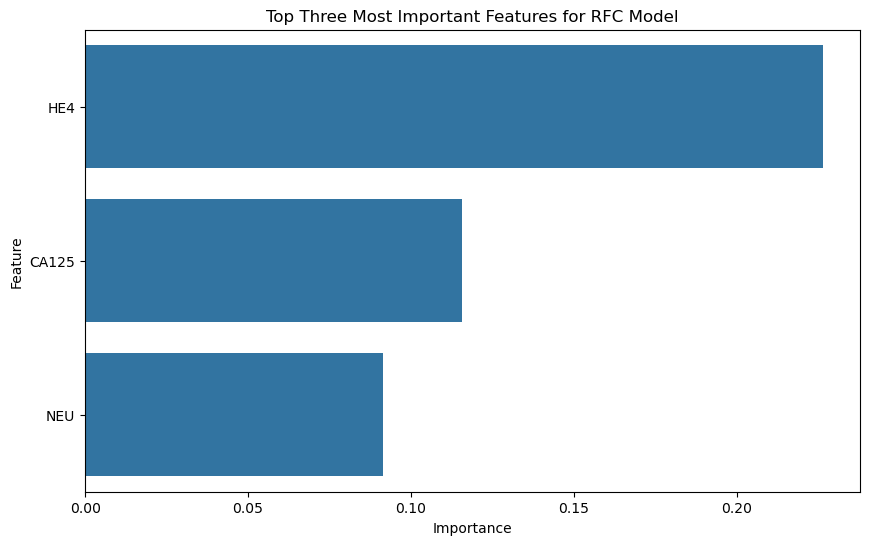

In [199]:

# Assuming `m_best_rfc` is your trained Random Forest model
importances = m_best_rfc.feature_importances_

# Create a DataFrame to display feature importances along with their names
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': importances})

# Sort the DataFrame by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Display the top three most important features
top_features = feature_importance_df.head(3)
print("Top Three Important Features for RFC Model:")
print(top_features)

# Plotting Feature Importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=top_features)  # Removed palette
plt.title('Top Three Most Important Features for RFC Model')
plt.show()


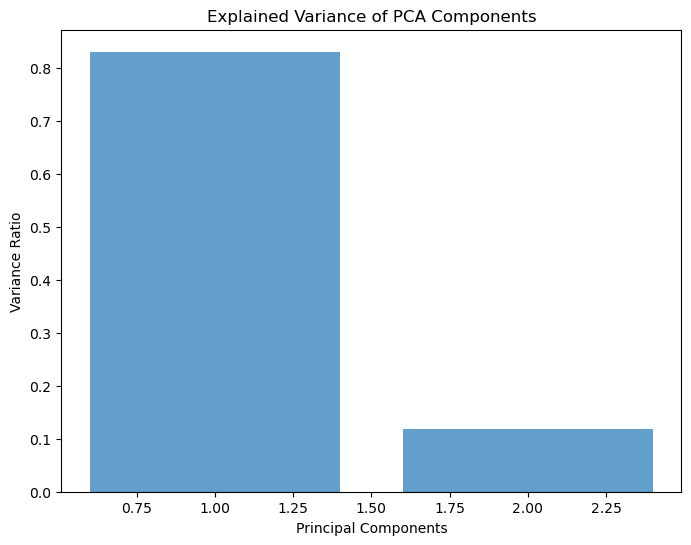

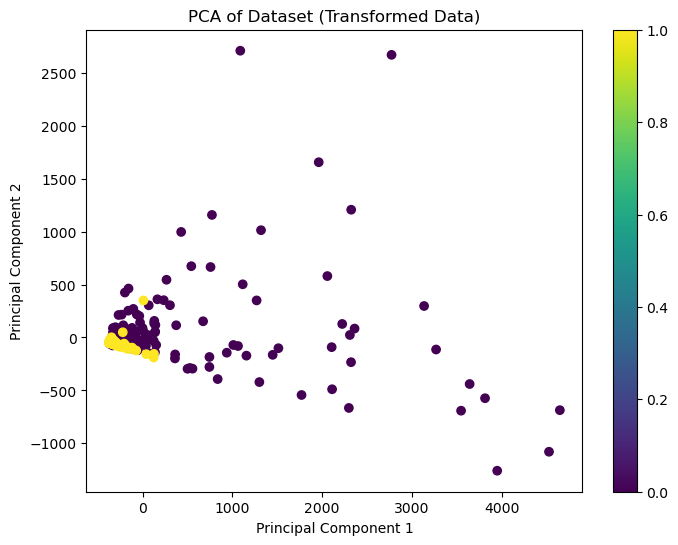

Train Accuracy: 1.0000
Test Accuracy: 0.9000
Training Confusion Matrix:
[[135   0]
 [  0 144]]
Testing Confusion Matrix:
[[31  5]
 [ 2 32]]


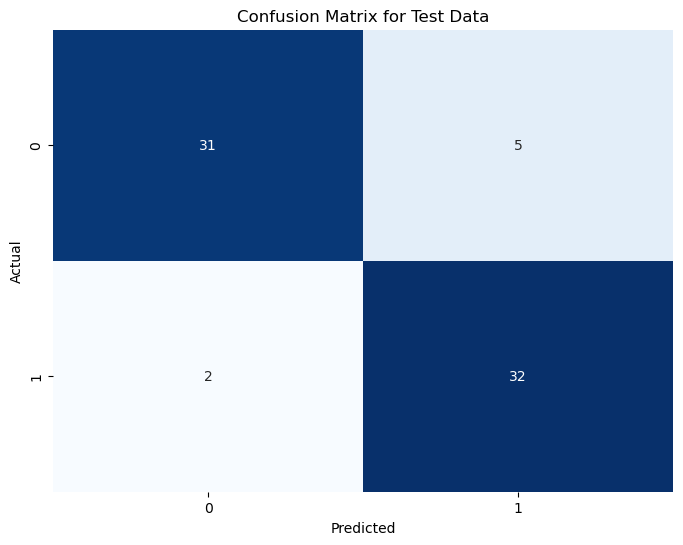

In [200]:
# Step 1: Apply PCA to reduce dimensions and extract the most important features
pca = PCA(n_components=2)  # Reduce to 2 components for visualization and model input
X_pca = pca.fit_transform(X)

# Step 2: Visualize the Explained Variance Ratio of PCA Components
plt.figure(figsize=(8, 6))
plt.bar(range(1, pca.n_components_ + 1), pca.explained_variance_ratio_, alpha=0.7, align='center')
plt.xlabel('Principal Components')
plt.ylabel('Variance Ratio')
plt.title('Explained Variance of PCA Components')
plt.show()

# Step 3: Visualize the Transformed Data in 2D
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis')
plt.title('PCA of Dataset (Transformed Data)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar()  # Add color bar for target classes
plt.show()

# Step 4: Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

# Step 5: Train the Random Forest Classifier on the PCA-transformed data
rfc = RandomForestClassifier(random_state=42)
rfc.fit(X_train, y_train)

# Step 6: Make predictions and evaluate the model
y_train_pred = rfc.predict(X_train)
y_test_pred = rfc.predict(X_test)

# Step 7: Print the evaluation metrics for the model
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f"Train Accuracy: {train_accuracy:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

# Confusion Matrix
print("Training Confusion Matrix:")
print(confusion_matrix(y_train, y_train_pred))

print("Testing Confusion Matrix:")
print(confusion_matrix(y_test, y_test_pred))

# Optional: You can visualize the confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_test_pred), annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix for Test Data')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


In [201]:
# Decision Tree Classifier

In [202]:
# Decision Tree Model - Expanded Hyperparameter Tuning (with overfitting reduction techniques)
param_dist_dt = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 7, 10],  # Limiting max_depth to avoid overfitting
    'min_samples_split': [2, 5, 10],  # Increasing min_samples_split
    'min_samples_leaf': [1, 2, 4],  # Increasing min_samples_leaf
    'class_weight': [None, 'balanced'],  # Optional: Use if classes are imbalanced
    'max_features': [None, 'sqrt', 'log2']  # Limiting features per split
}

dtc = RandomizedSearchCV(DecisionTreeClassifier(random_state=42), param_distributions=param_dist_dt, n_iter=10, cv=3, n_jobs=-1, random_state=42)
dtc.fit(X_train, y_train)
best_dtc = dtc.best_estimator_

# Predicting the outcomes
y_train_pred = dtc.predict(X_train)
y_test_pred = dtc.predict(X_test)

# Calculate metrics
metrics = {
    'Train Accuracy': accuracy_score(y_train, y_train_pred),
    'Test Accuracy': accuracy_score(y_test, y_test_pred),
    'Precision': precision_score(y_test, y_test_pred, average='weighted', zero_division=1),
    'Recall': recall_score(y_test, y_test_pred, average='weighted'),
    'F1 Score': f1_score(y_test, y_test_pred, average='weighted'),
    'AUC': roc_auc_score(y_test, dtc.predict_proba(X_test)[:, 1]),
    'Log Loss': log_loss(y_test, dtc.predict_proba(X_test))
}

# Print evaluation results
print(f"Best Decision Tree Model Evaluation:")
print("Training confusion matrix:\n", confusion_matrix(y_train, y_train_pred))
print("Testing confusion matrix:\n", confusion_matrix(y_test, y_test_pred))
for metric, value in metrics.items():
    print(f"{metric}: {value:.4f}")


Best Decision Tree Model Evaluation:
Training confusion matrix:
 [[115  20]
 [  5 139]]
Testing confusion matrix:
 [[28  8]
 [ 2 32]]
Train Accuracy: 0.9104
Test Accuracy: 0.8571
Precision: 0.8686
Recall: 0.8571
F1 Score: 0.8564
AUC: 0.7970
Log Loss: 3.8012


In [203]:
dtc_overfit = DecisionTreeClassifier(max_depth=None, random_state=42)

# Train the model
dtc_overfit.fit(X_train, y_train)

# Predictions
y_train_pred = dtc_overfit.predict(X_train)
y_test_pred = dtc_overfit.predict(X_test)

# Metrics
print(f"Overfitting Decision Tree Model:")
print(f"Train Accuracy: {accuracy_score(y_train, y_train_pred):.4f}")
print(f"Test Accuracy: {accuracy_score(y_test, y_test_pred):.4f}")
print("Training confusion matrix:\n", confusion_matrix(y_train, y_train_pred))
print("Testing confusion matrix:\n", confusion_matrix(y_test, y_test_pred))


Overfitting Decision Tree Model:
Train Accuracy: 1.0000
Test Accuracy: 0.7714
Training confusion matrix:
 [[135   0]
 [  0 144]]
Testing confusion matrix:
 [[28  8]
 [ 8 26]]


In [204]:
dtc_underfit = DecisionTreeClassifier(max_depth=3, random_state=42)

# Train the model
dtc_underfit.fit(X_train, y_train)

# Predictions
y_train_pred = dtc_underfit.predict(X_train)
y_test_pred = dtc_underfit.predict(X_test)

# Metrics
print(f"Underfitting Decision Tree Model:")
print(f"Train Accuracy: {accuracy_score(y_train, y_train_pred):.4f}")
print(f"Test Accuracy:{ accuracy_score(y_test, y_test_pred):.4f}")
print("Training confusion matrix:\n", confusion_matrix(y_train, y_train_pred))
print("Testing confusion matrix:\n", confusion_matrix(y_test, y_test_pred))

Underfitting Decision Tree Model:
Train Accuracy: 0.8710
Test Accuracy:0.8143
Training confusion matrix:
 [[103  32]
 [  4 140]]
Testing confusion matrix:
 [[25 11]
 [ 2 32]]


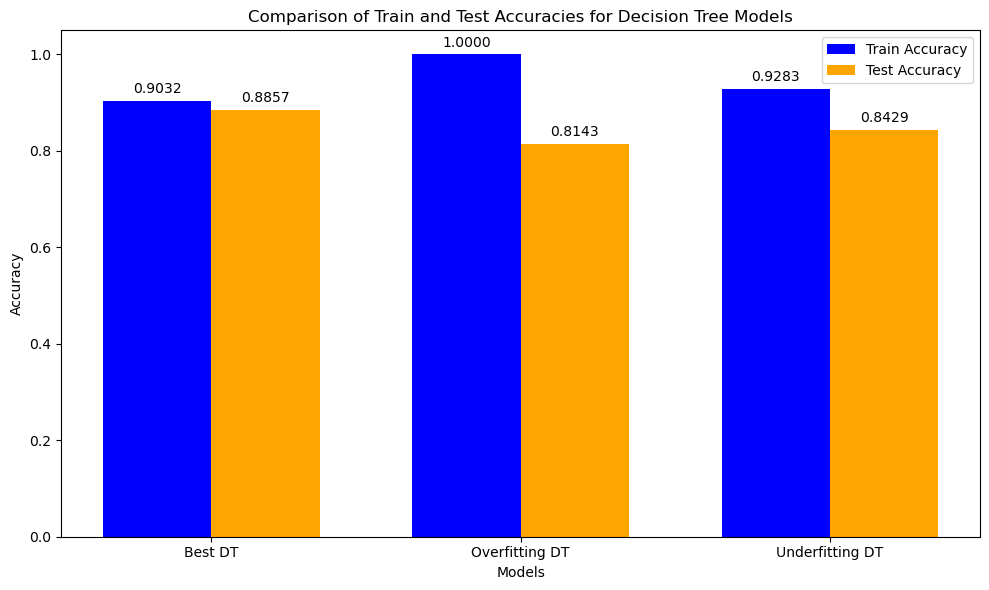

In [205]:
import matplotlib.pyplot as plt
import numpy as np

# Data for comparison
models = ['Best DT', 'Overfitting DT', 'Underfitting DT']
train_accuracies = [0.9032, 1.0000, 0.9283]
test_accuracies = [0.8857, 0.8143, 0.8429]

# Plotting
plt.figure(figsize=(10, 6))
x = np.arange(len(models))  # X-axis positions
width = 0.35  # Bar width

# Plot bars for Train and Test Accuracies
bars_train = plt.bar(x - width/2, train_accuracies, width, label='Train Accuracy', color='b')  # Blue for Train
bars_test = plt.bar(x + width/2, test_accuracies, width, label='Test Accuracy', color='orange')  # Orange for Test

# Adding labels and title
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Comparison of Train and Test Accuracies for Decision Tree Models')
plt.xticks(x, models)
plt.legend()

# Adding values on top of the bars
for bar in bars_train:
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01,  # Positioning text slightly above the bar
             f'{bar.get_height():.4f}', ha='center', va='bottom', fontsize=10)

for bar in bars_test:
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01,  # Positioning text slightly above the bar
             f'{bar.get_height():.4f}', ha='center', va='bottom', fontsize=10)

# Display the plot
plt.tight_layout()
plt.show()


Top Three Important Features for DT Model:
   Feature  Importance
6      HE4    0.816087
7      CEA    0.144680
31     AST    0.039232


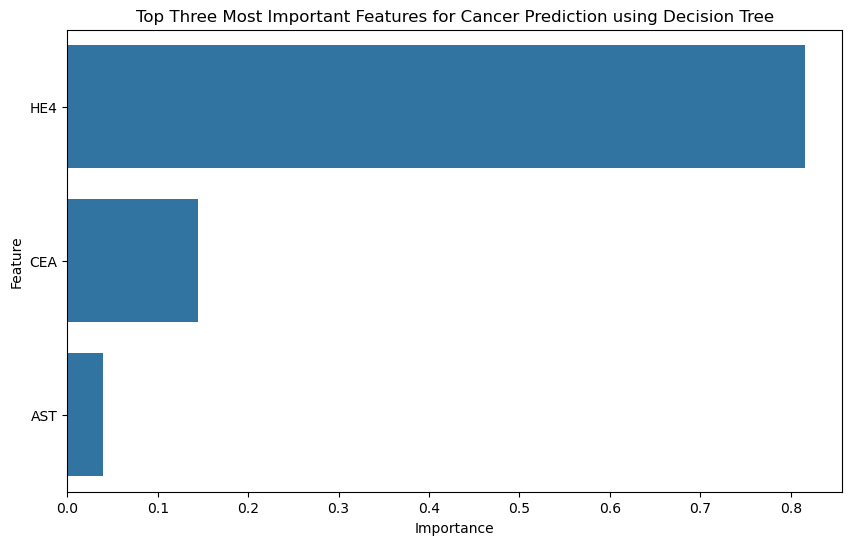

In [206]:
importances = m_best_dtc.feature_importances_

# Create a DataFrame to display feature importances along with their names
feature_importance_df_dtc = pd.DataFrame({'Feature': X.columns, 'Importance': importances})

# Sort the DataFrame by importance in descending order
feature_importance_df_dtc = feature_importance_df_dtc.sort_values(by='Importance', ascending=False)

# Display the top three most important features
top_features_dtc = feature_importance_df_dtc.head(3)
print("Top Three Important Features for DT Model:")
print(top_features_dtc)

# Plotting Feature Importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=top_features_dtc)
plt.title('Top Three Most Important Features for Cancer Prediction using Decision Tree')
plt.show()

In [ ]:
# All Model Comparison

In [207]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    roc_auc_score, log_loss, confusion_matrix
)
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

# Assuming combined_data is your DataFrame
X = combined_data.drop(['TYPE', 'TYPE.1'], axis=1)
y = combined_data['TYPE']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

def evaluate_model(model, X_train, y_train, X_test, y_test, model_name):
    """ Evaluate the trained model and print relevant metrics. """
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Calculate metrics
    metrics = {
        'Train Accuracy': accuracy_score(y_train, y_train_pred),
        'Test Accuracy': accuracy_score(y_test, y_test_pred),
        'Precision': precision_score(y_test, y_test_pred, average='weighted', zero_division=1),
        'Recall': recall_score(y_test, y_test_pred, average='weighted'),
        'F1 Score': f1_score(y_test, y_test_pred, average='weighted'),
        'AUC': roc_auc_score(y_test, model.predict_proba(X_test)[:, 1]),
        'Log Loss': log_loss(y_test, model.predict_proba(X_test)),
    }

    # Print metrics
    print(f"\n{model_name} Model Evaluation:")
    print('Training confusion matrix:')
    print(confusion_matrix(y_train, y_train_pred))
    print('Testing confusion matrix:')
    print(confusion_matrix(y_test, y_test_pred))
    for metric, value in metrics.items():
        print(f"{metric}: {value:.4f}")

    return metrics

# K-Nearest Neighbors Model - Tune `n_neighbors`
param_dist_knn = {'n_neighbors': np.arange(1, 11)}
knn = RandomizedSearchCV(KNeighborsClassifier(), param_distributions=param_dist_knn, n_iter=5, cv=3, n_jobs=-1, random_state=42)
knn.fit(X_train, y_train)
best_knn = knn.best_estimator_

print("\nEvaluating KNN Model...")
metrics_knn = evaluate_model(best_knn, X_train, y_train, X_test, y_test, model_name='KNN')

# Random Forest Model - Expanded Hyperparameter Tuning (with overfitting reduction techniques)
param_dist_rf = {
    'n_estimators': [100, 200, 300],
    'max_features': ['sqrt', 'log2'],
    'max_depth': [4, 6, 8, 10],  # Limiting depth to prevent overfitting
    'min_samples_split': [2, 5, 10],  # Increasing min_samples_split
    'min_samples_leaf': [1, 2, 4],  # Increasing min_samples_leaf
    'criterion': ['gini', 'entropy']
}

rfc = RandomizedSearchCV(RandomForestClassifier(random_state=42), param_distributions=param_dist_rf, n_iter=10, cv=3, n_jobs=-1, random_state=42)
rfc.fit(X_train, y_train)
best_rfc = rfc.best_estimator_

print("\nEvaluating Random Forest Model...")
metrics_rf = evaluate_model(best_rfc, X_train, y_train, X_test, y_test, model_name='Random Forest')

# Decision Tree Model - Expanded Hyperparameter Tuning (with overfitting reduction techniques)
param_dist_dt = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 7, 10],  # Limiting max_depth to avoid overfitting
    'min_samples_split': [2, 5, 10],  # Increasing min_samples_split
    'min_samples_leaf': [1, 2, 4],  # Increasing min_samples_leaf
    'class_weight': [None, 'balanced'],  # Optional: Use if classes are imbalanced
    'max_features': [None, 'sqrt', 'log2']  # Limiting features per split
}

dtc = RandomizedSearchCV(DecisionTreeClassifier(random_state=42), param_distributions=param_dist_dt, n_iter=10, cv=3, n_jobs=-1, random_state=42)
dtc.fit(X_train, y_train)
best_dtc = dtc.best_estimator_

print("\nEvaluating Decision Tree Model...")
metrics_dt = evaluate_model(best_dtc, X_train, y_train, X_test, y_test, model_name='Decision Tree')

# Store evaluation metrics for comparison
metrics_data = {
    'Model': ['KNN', 'Random Forest', 'Decision Tree'],
    'Train Accuracy': [
        metrics_knn['Train Accuracy'],
        metrics_rf['Train Accuracy'],
        metrics_dt['Train Accuracy']
    ],
    'Test Accuracy': [
        metrics_knn['Test Accuracy'],
        metrics_rf['Test Accuracy'],
        metrics_dt['Test Accuracy']
    ],
    'Precision': [
        metrics_knn['Precision'],
        metrics_rf['Precision'],
        metrics_dt['Precision']
    ],
    'Recall': [
        metrics_knn['Recall'],
        metrics_rf['Recall'],
        metrics_dt['Recall']
    ],
    'F1 Score': [
        metrics_knn['F1 Score'],
        metrics_rf['F1 Score'],
        metrics_dt['F1 Score']
    ],
    'AUC': [
        metrics_knn['AUC'],
        metrics_rf['AUC'],
        metrics_dt['AUC']
    ],
    'Log Loss': [
        metrics_knn['Log Loss'],
        metrics_rf['Log Loss'],
        metrics_dt['Log Loss']
    ]
}

# Creating a DataFrame for easy comparison
metrics_df = pd.DataFrame(metrics_data)
print(metrics_df)



Evaluating KNN Model...

KNN Model Evaluation:
Training confusion matrix:
[[106  29]
 [ 10 134]]
Testing confusion matrix:
[[29  7]
 [ 3 31]]
Train Accuracy: 0.8602
Test Accuracy: 0.8571
Precision: 0.8623
Recall: 0.8571
F1 Score: 0.8569
AUC: 0.9105
Log Loss: 1.3167

Evaluating Random Forest Model...

Random Forest Model Evaluation:
Training confusion matrix:
[[131   4]
 [  0 144]]
Testing confusion matrix:
[[30  6]
 [ 1 33]]
Train Accuracy: 0.9857
Test Accuracy: 0.9000
Precision: 0.9087
Recall: 0.9000
F1 Score: 0.8997
AUC: 0.9371
Log Loss: 0.3561

Evaluating Decision Tree Model...

Decision Tree Model Evaluation:
Training confusion matrix:
[[110  25]
 [  2 142]]
Testing confusion matrix:
[[29  7]
 [ 1 33]]
Train Accuracy: 0.9032
Test Accuracy: 0.8857
Precision: 0.8979
Recall: 0.8857
F1 Score: 0.8852
AUC: 0.9220
Log Loss: 0.7897
           Model  Train Accuracy  Test Accuracy  Precision    Recall  \
0            KNN        0.860215       0.857143   0.862312  0.857143   
1  Random Fores

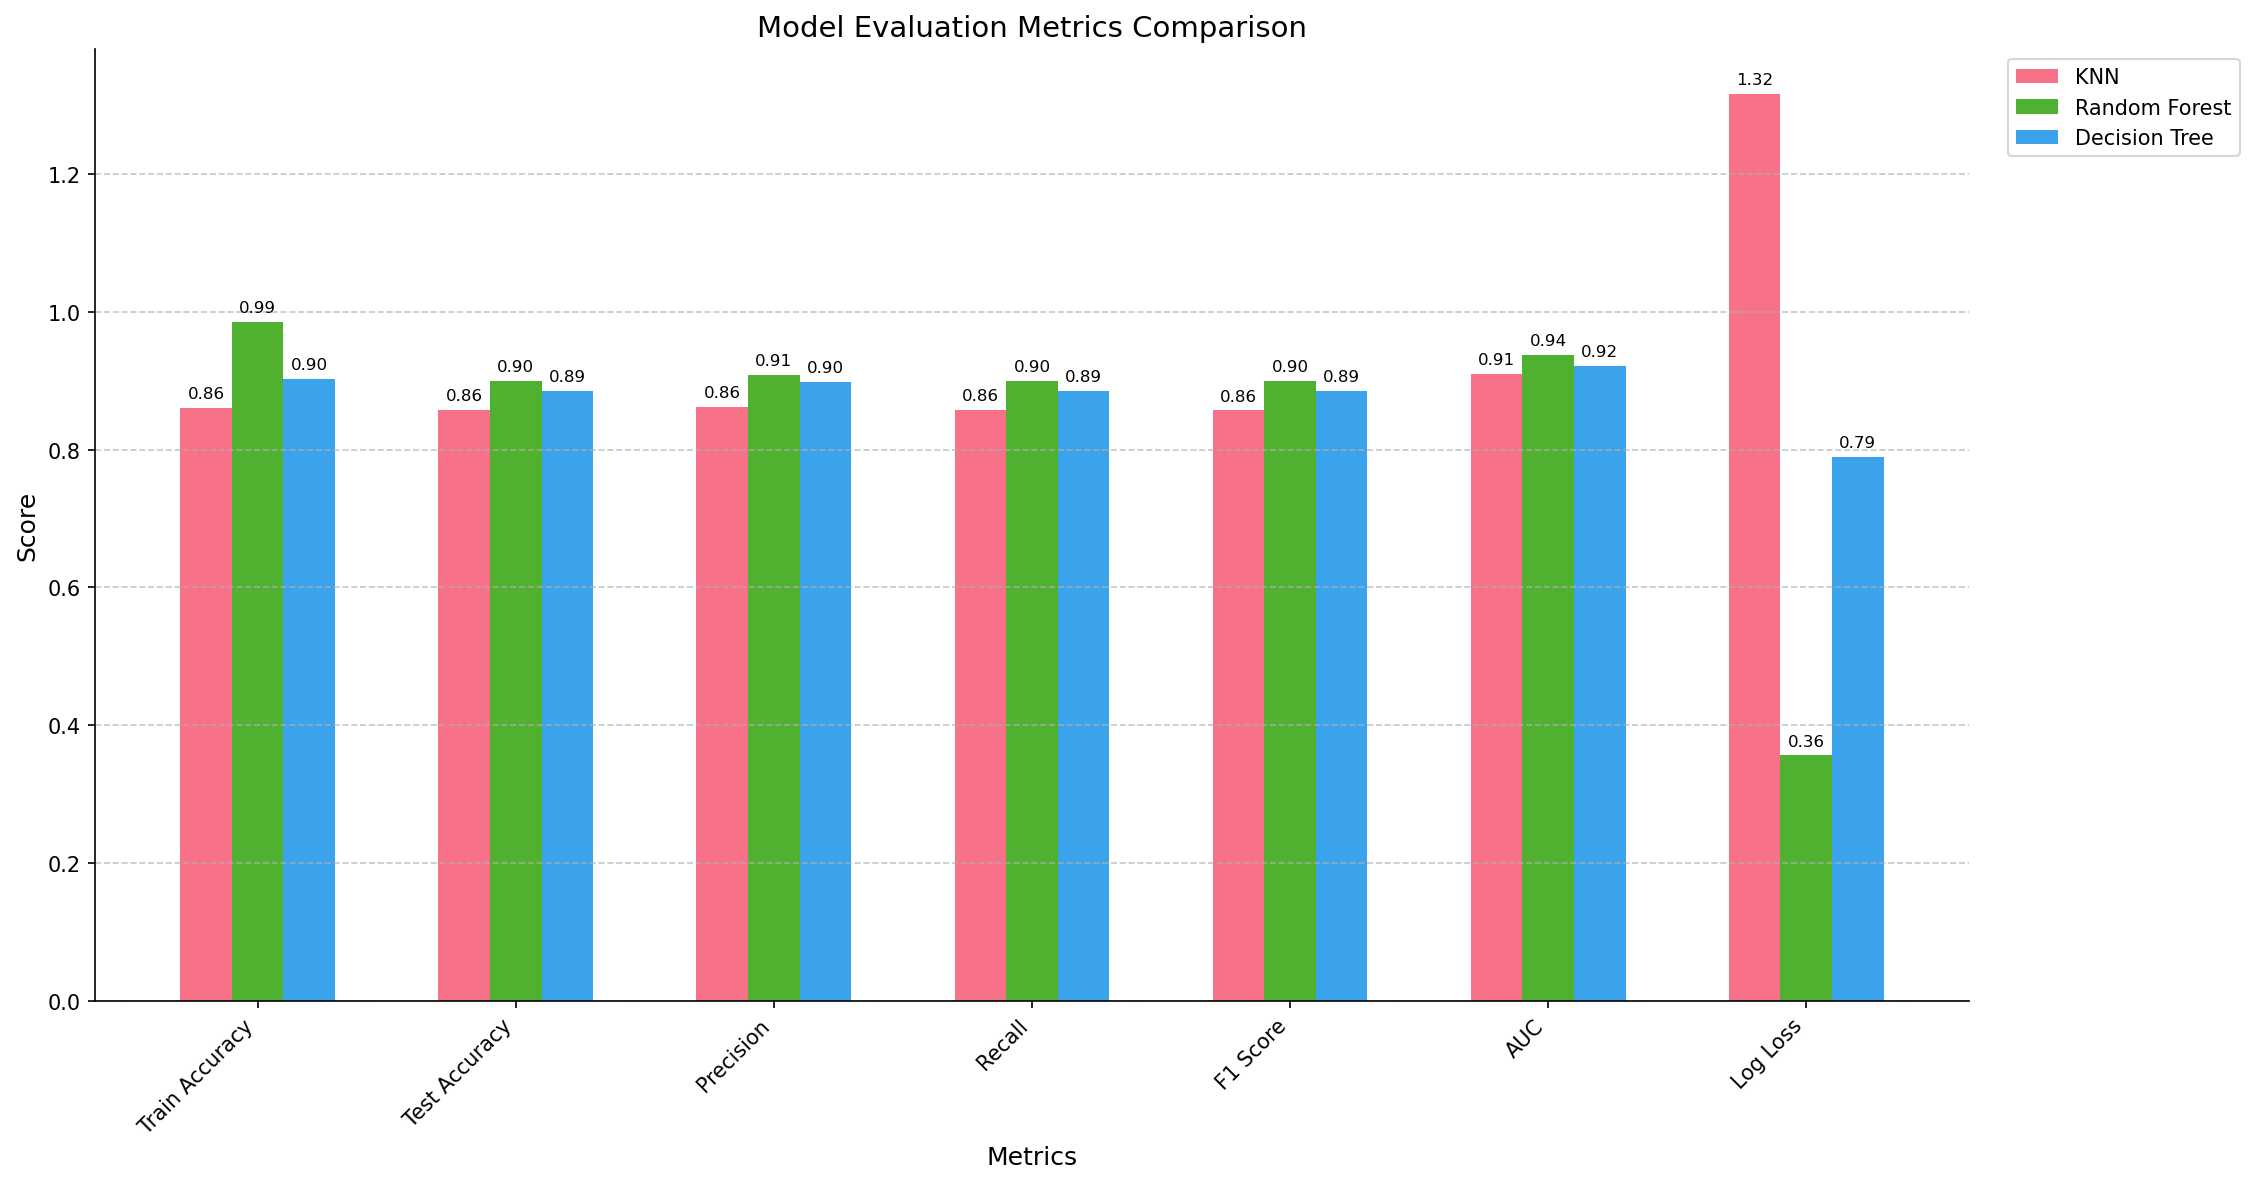

In [208]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

metrics_names = ['Train Accuracy', 'Test Accuracy', 'Precision', 'Recall', 'F1 Score', 'AUC', 'Log Loss']

# Define colors for the models
colors = sns.color_palette("husl", 3)  # Adjusted for 3 models

# Set up the figure and axes
num_metrics = len(metrics_names)
num_models = 3  # KNN, Random Forest, Decision Tree
bar_width = 0.2
index = np.arange(num_metrics)

fig, ax = plt.subplots(figsize=(15, 8), dpi=150)

# Create grouped bars for each model
for i, model_name in enumerate(['KNN', 'Random Forest', 'Decision Tree']):
    model_metrics = [metrics_knn, metrics_rf, metrics_dt][i]
    ax.bar(index + i * bar_width, [model_metrics[metric] for metric in metrics_names],
           bar_width, label=model_name, color=colors[i])

# Add labels, titles, and custom x-axis tick labels
ax.set_xlabel('Metrics', fontsize=12)
ax.set_ylabel('Score', fontsize=12)
ax.set_title('Model Evaluation Metrics Comparison', fontsize=14)
ax.set_xticks(index + (num_models - 1) * bar_width / 2)  # Center tick labels
ax.set_xticklabels(metrics_names, rotation=45, ha='right', fontsize=10)
ax.legend(loc='upper right', bbox_to_anchor=(1.15, 1), fontsize=10)  # Outside legend

# Add grid and remove spines
ax.grid(axis='y', linestyle='--', alpha=0.7)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Add value annotations on top of the bars
for i, model_name in enumerate(['KNN', 'Random Forest', 'Decision Tree']):
    model_metrics = [metrics_knn, metrics_rf, metrics_dt][i]
    for j, metric in enumerate(metrics_names):
        yval = model_metrics[metric]
        ax.text(index[j] + i * bar_width, yval + 0.01, f'{yval:.2f}', ha='center', va='bottom', fontsize=8)

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()
